In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [270]:
data_orig = pd.read_csv('../MA_PREDICTOR/data/ma_data_car.csv', parse_dates=['announcement_date'])

In [5]:
data_orig.columns

Index(['id', 'announcement_date', 'deal_value', 'acquiror_total_assets',
       'acquiror_name', 'acquiror_ticker', 'target_name', 'target_nation',
       'acquiror_nation', 'target_status', 'acquiror_industry',
       'target_industry', 'shares_at_announcement', 'shares_acquired',
       'consideration_offered', 'attitude', 'acquisition_technique',
       'acquiror_financial_advisor', 'target_financial_advisor', 'purpose',
       'acquiror_code', 'target_code', 'car'],
      dtype='object')

# Outliers

## Detecting outliers

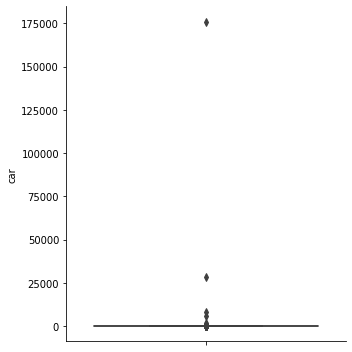

In [7]:
sns.catplot(data=data_orig, y='car', kind='box')

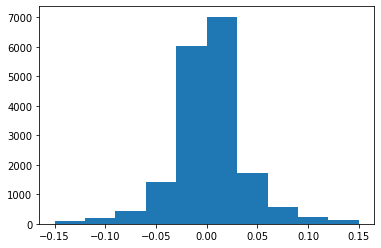

In [8]:
plt.hist(data_orig.car, range=(-0.15, 0.15));

## Excluding outliers

In [223]:
data = data_orig[(data_orig.car > -0.3) & (data_orig.car < 0.3)]

In [224]:
(len(data_orig) - len(data)) / len(data_orig)

0.012730917167777236

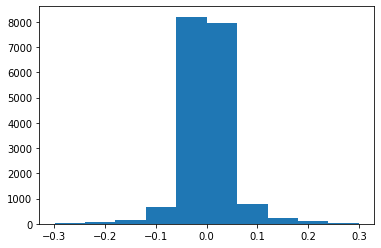

In [225]:
plt.hist(data.car);

# announcement_date

In [227]:
# Extracting month from announcement_date
months = data[['car']]
months['month'] = pd.DatetimeIndex(data['announcement_date']).month

## Distribution

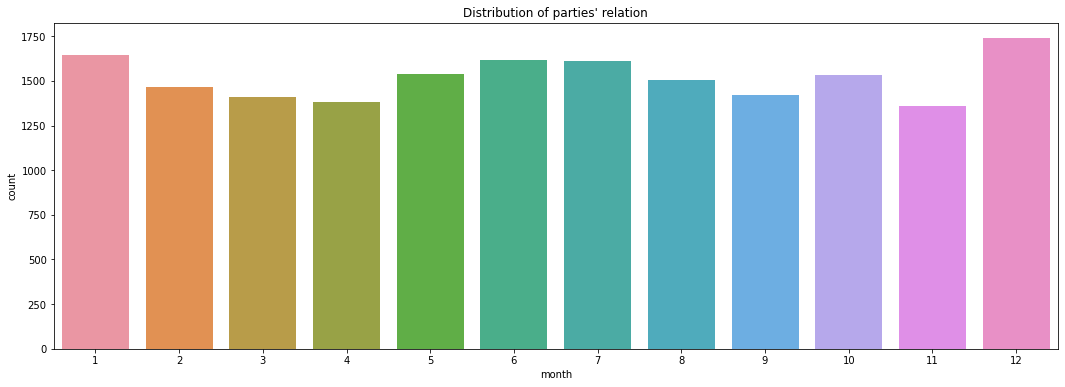

In [234]:
order = range(1,13)

plt.figure(figsize=(18,6))
plt.title("Distribution of parties' relation")
sns.countplot(x=months.month, order=order);

# to see they are equally distributed

## Impact on target

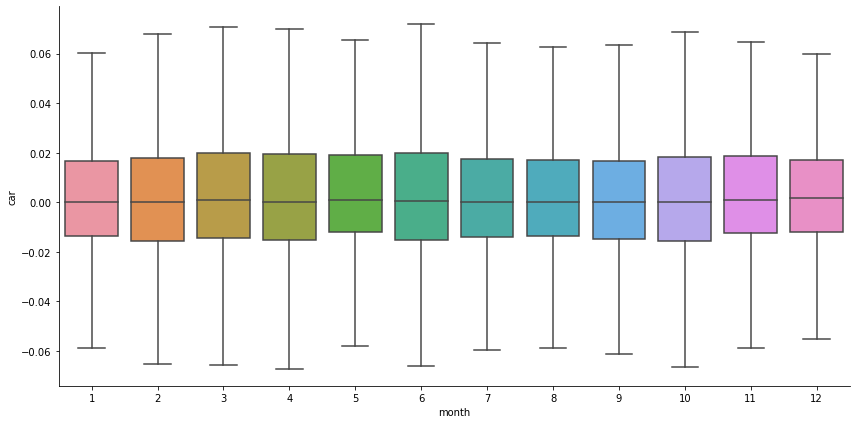

In [238]:
sns.catplot(data=months, x='month', y='car', kind='box', order=order, showfliers=False, height=6, aspect=2);

# no impact can be observed

# (deal_value)

In [242]:
# removing nas
value = data[data.deal_value.notna()][['deal_value', 'car']]

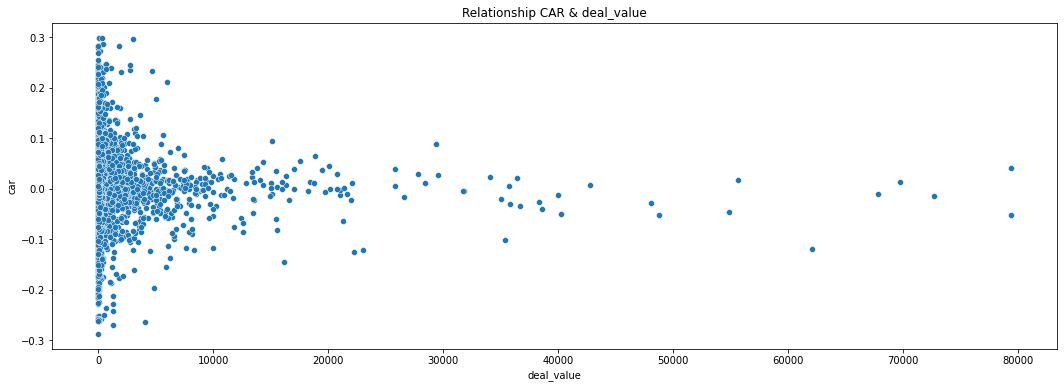

In [250]:
plt.figure(figsize=(18,6))
plt.title("Relationship CAR & deal_value")
sns.scatterplot(data=value, x='deal_value', y='car');

In [245]:
sns.scatterplot?

# ..._nation

In [260]:
# Creating dataframe with cross-border feature
nation = data[['acquiror_nation', 'target_nation', 'car']]
nation['cross_border'] = nation.apply(lambda row: 'cross_border' if row.acquiror_nation == row.target_nation else 'national', axis=1)

/var/folders/z8/077xt3wd30j28k4_3vtz7gn00000gn/T/ipykernel_77799/207191866.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nation['cross_border'] = nation.apply(lambda row: 'cross_border' if row.acquiror_nation == row.target_nation else 'national', axis=1)


## Cross_border

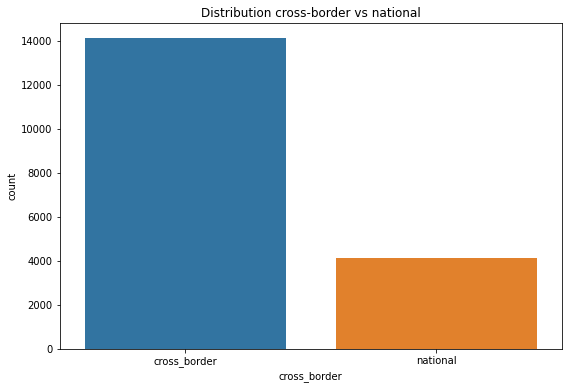

In [264]:
plt.figure(figsize=(9,6))
plt.title("Distribution cross-border vs national")
sns.countplot(x=nation.cross_border);

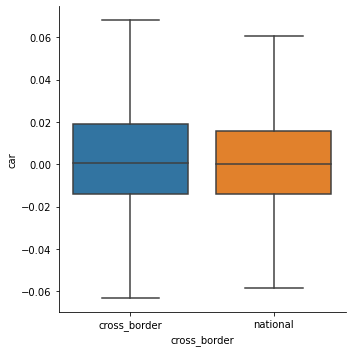

In [293]:
sns.catplot(data=nation, x='cross_border', y='car', kind='box', showfliers=False);

# shares_...

In [275]:
shares = data[['shares_at_announcement', 'shares_acquired', 'car']]

# Divide into minority (<50), majority (>50) and full (100)
def mag_acqu(x):
    if x != 100:
        return 'not_full'
    return 'full'


## Distribution

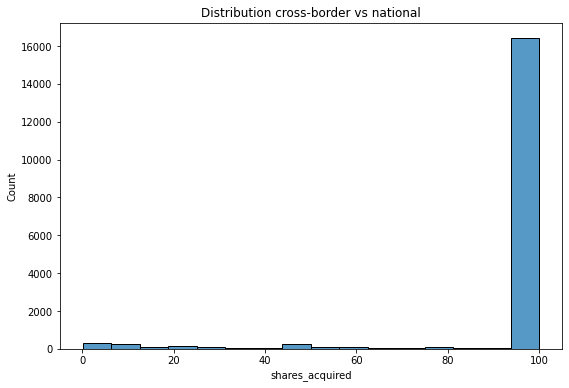

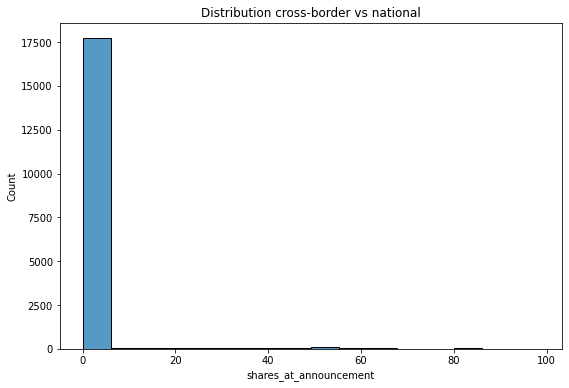

In [284]:
plt.figure(figsize=(9,6))
plt.title("Distribution cross-border vs national")
sns.histplot(x=shares.shares_acquired);
plt.figure(figsize=(9,6))
plt.title("Distribution cross-border vs national")
sns.histplot(x=shares.shares_at_announcement);

## Impact on target

# consideration_offered

In [287]:
tmp = data[['consideration_offered', 'car']]
# has to be transformed first -> everything that only has cash will be 'cash', rest 'other'

# transform pipes into list of all considerations
list_gen = lambda x: x.split('|')
tmp['consideration_offered'] = tmp.consideration_offered.apply(list_gen)

# Cluster considerations
def cash(considerations):
    
    for consideration in considerations:
        if 'Cash' not in consideration:
            return 'Other'
    return 'Cash'

# Apply
tmp['consideration_offered'] = tmp.apply(lambda row: cash(row.consideration_offered), axis=1)

/var/folders/z8/077xt3wd30j28k4_3vtz7gn00000gn/T/ipykernel_77799/647914855.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['consideration_offered'] = tmp.consideration_offered.apply(list_gen)
/var/folders/z8/077xt3wd30j28k4_3vtz7gn00000gn/T/ipykernel_77799/647914855.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['consideration_offered'] = tmp.apply(lambda row: cash(row.consideration_offered), axis=1)


## Distribution

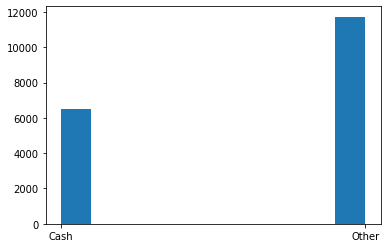

In [288]:
plt.hist(tmp.consideration_offered);

## Impact on target

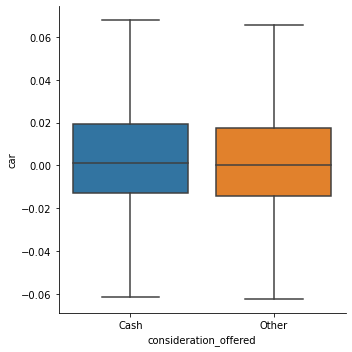

In [291]:
sns.catplot(data=tmp, x='consideration_offered', y='car', kind='box', showfliers=False)

In [20]:
tmp.groupby(by='consideration_offered').mean()

,car
consideration_offered,
Cash,0.004287
Other,0.002304


In [21]:
tmp.car.mean() # to show that on average, cash performs better than non-cash

0.0030104735175560697

# Attitude (disregard due to lack of data)

In [22]:
data.attitude.unique()

array(['Friendly', 'No Applicable', 'Neutral', 'Hostile', 'Unsolicited'],
      dtype=object)

## Distribution

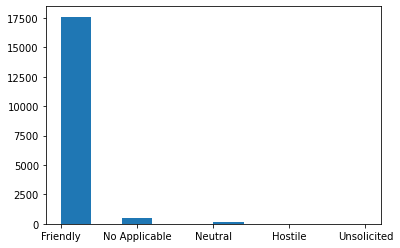

In [23]:
plt.hist(data.attitude);

## Impact on target

<AxesSubplot:xlabel='attitude'>

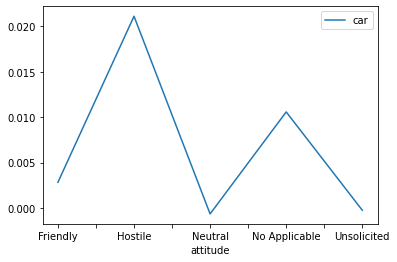

In [24]:
data.groupby(by='attitude').mean()[['car']].plot()

In [25]:
data.attitude.value_counts() # shows us that this is not meaningful, with only 3 observations

Friendly         17613
No Applicable      478
Neutral            124
Unsolicited          6
Hostile              3
Name: attitude, dtype: int64

# acquisition_techniques

In [26]:
# to be ignored for now

# acquiror_financial_advisor (target_financial_advisor)

In [27]:
# to be ignored for now

# purpose

In [28]:
# to be ignored for now

# industry_relatedness (acquiror_code, target_code)

**Relatedness from top to bottom:**
1. Same industry (Iron & Steel)
2. Same industry group (Metals & Mining)
3. Same business sector (Mineral Resources)
4. Same economic sector (Basic Materials)
5. Not related

In [29]:
tmp = data[['car']]

In [30]:
# Transform codes

def relatedness(acquiror, target):
    if acquiror == target:
        return 'industry'
    elif acquiror[:6] == target[:6]:
        return 'industry_group'
    elif acquiror[:4] == target[:4]:
        return 'business_sector'
    elif acquiror[:2] == target[:2]:
        return 'economic_sector'
    else:
        return 'not_related'

In [31]:
tmp['relatedness'] = data.apply(lambda row: relatedness(str(row.acquiror_code), str(row.target_code)), axis=1)

/var/folders/z8/077xt3wd30j28k4_3vtz7gn00000gn/T/ipykernel_77799/436178826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['relatedness'] = data.apply(lambda row: relatedness(str(row.acquiror_code), str(row.target_code)), axis=1)


## Distribution

In [32]:
tmp.relatedness.value_counts()

industry           7319
not_related        5988
industry_group     1923
economic_sector    1601
business_sector    1393
Name: relatedness, dtype: int64

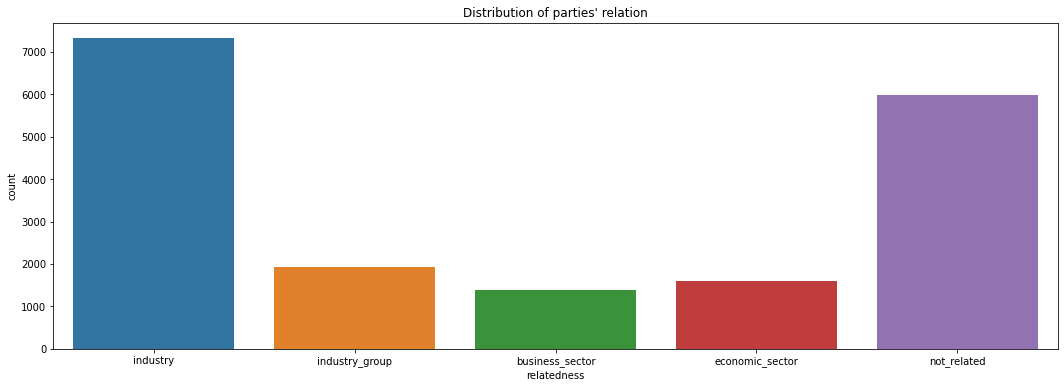

In [33]:
order = ['industry', 'industry_group', 'business_sector', 'economic_sector', 'not_related']

plt.figure(figsize=(18,6))
plt.title("Distribution of parties' relation")
sns.countplot(x=tmp.relatedness, order=order);

## Impact on target

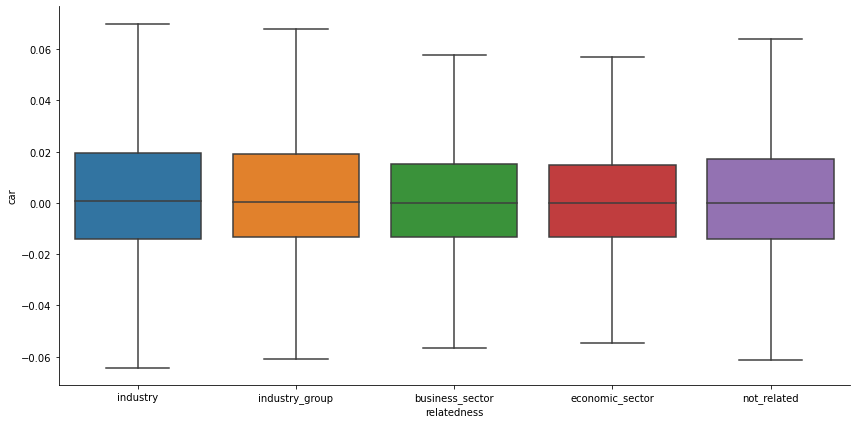

In [34]:
sns.catplot(data=tmp, x='relatedness', y='car', kind='box', order=order, showfliers=False, height=6, aspect=2);

# acquiror_industry

## Preprocessing

In [35]:
# we can access information on industry on acquiror_id (8 digit code, 2 per level of classification)
print('example acquiror_code:', data.acquiror_code[0])

example acquiror_code: 50102030


* 0-2 gives economic_sector
* 0-4 gives business_sector
* 0-6 gives industry_group
* 0-8 gives industry

In [295]:
# transform code into different cols mentioned above
def declassifier(x):
    x = str(x)
    return x[:2], x[:4], x[:6], x

In [296]:
tmp = data[['car']]

In [297]:
tmp['economic_sector'], tmp['business_sector'], tmp['industry_group'], tmp['industry'] = \
zip(*data['acquiror_code'].map(declassifier))

/var/folders/z8/077xt3wd30j28k4_3vtz7gn00000gn/T/ipykernel_77799/2973707135.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['economic_sector'], tmp['business_sector'], tmp['industry_group'], tmp['industry'] = \


In [298]:
tmp

,car,economic_sector,business_sector,industry_group,industry
0,0.006854,50,5010,501020,50102030
1,-0.010266,54,5420,542010,54201030
2,0.007746,57,5720,572010,57201030
3,-0.011133,52,5210,521020,52102010
4,-0.003971,50,5010,501020,50102030
...,...,...,...,...,...
18454,0.020108,52,5210,521020,52102010
18455,-0.040156,53,5320,532030,53203020
18456,-0.003545,54,5430,543010,54301020
18457,-0.025992,55,5510,551010,55101010


## economic_sector

### Distribution

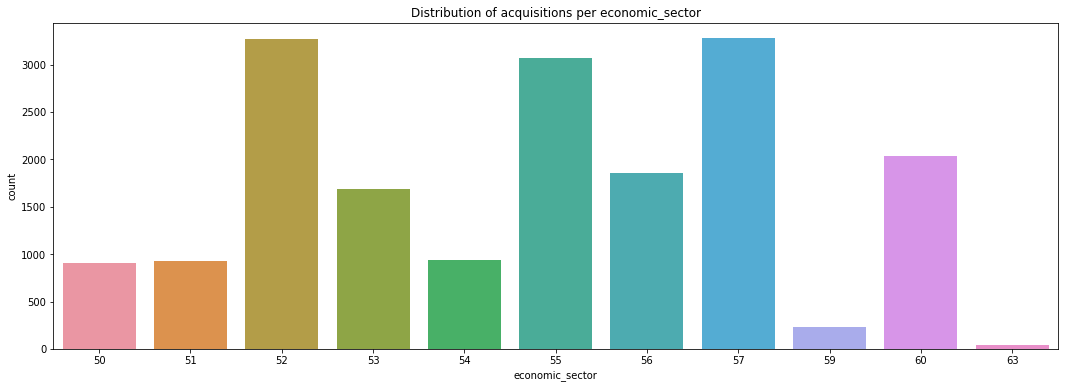

In [299]:
order = sorted(tmp.economic_sector.unique())

plt.figure(figsize=(18,6))
plt.title("Distribution of acquisitions per economic_sector")
sns.countplot(x=tmp.economic_sector, order=order);

### Impact on target

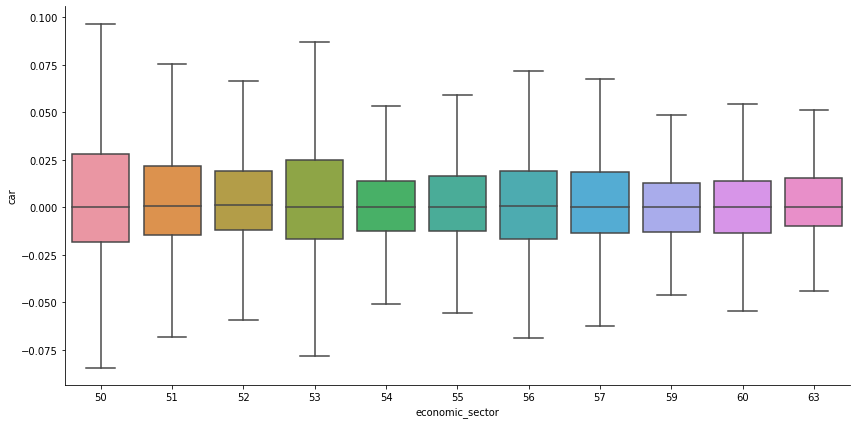

In [300]:
sns.catplot(data=tmp, x='economic_sector', y='car', kind='box', order=order, showfliers=False, height=6, aspect=2);

## business_sector

In [301]:
print(tmp.business_sector.nunique()) # 29 sectors
tmp.business_sector.nunique() # 29 sectors

29


29

### Distribution

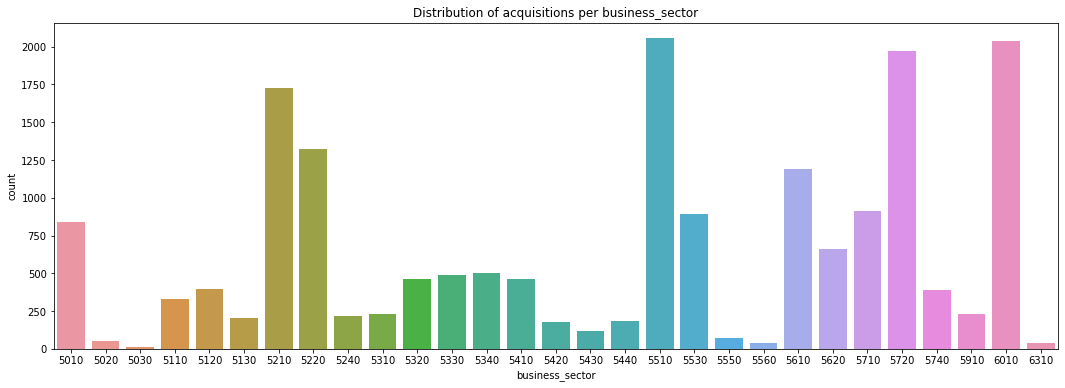

In [302]:
sectors = sorted(tmp.business_sector.unique())

plt.figure(figsize=(18,6))
plt.title("Distribution of acquisitions per business_sector")
sns.countplot(x=tmp.business_sector, order=sectors);

### Impact on target

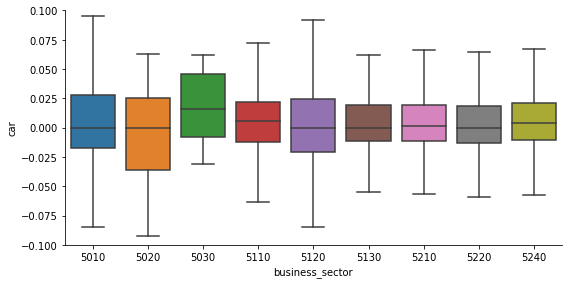

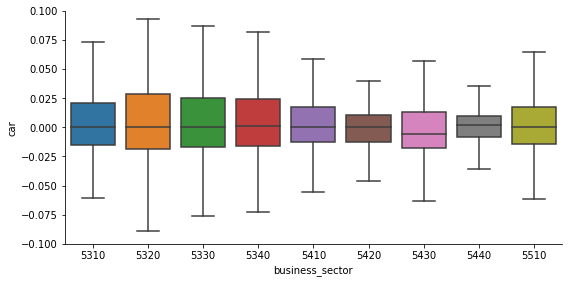

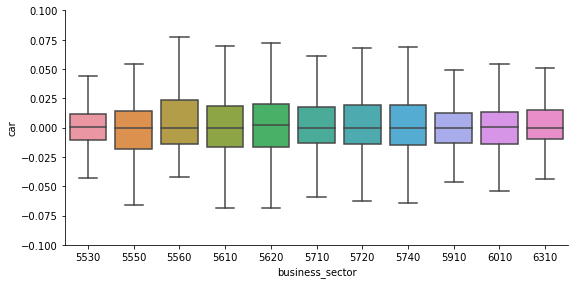

In [303]:
i = int(tmp.business_sector.nunique() / 3)
p1 = sectors[:i]
p2 = sectors[i: i + i]
p3 = sectors[i + i:]
tmp1 = tmp.loc[tmp['business_sector'].isin(p1)]
tmp2 = tmp.loc[tmp['business_sector'].isin(p2)]
tmp3 = tmp.loc[tmp['business_sector'].isin(p3)]
df = [tmp1, tmp2, tmp3]
order = [p1, p2, p3]

for df, order in zip(df, order):
    sns.catplot(data=df, x='business_sector', y='car',
                kind='box', order=order, showfliers=False, height=4, aspect=2).set(ylim=(-0.1, 0.1));

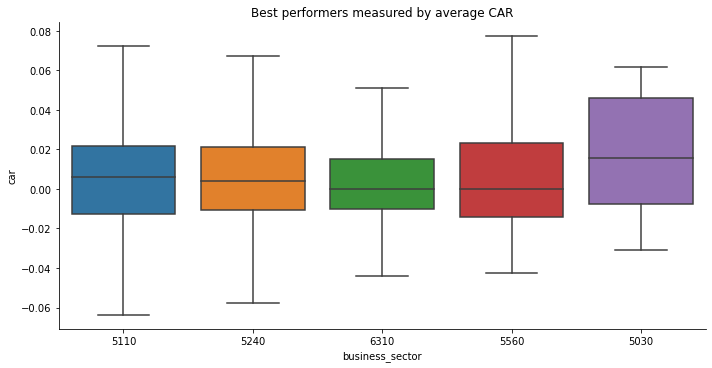

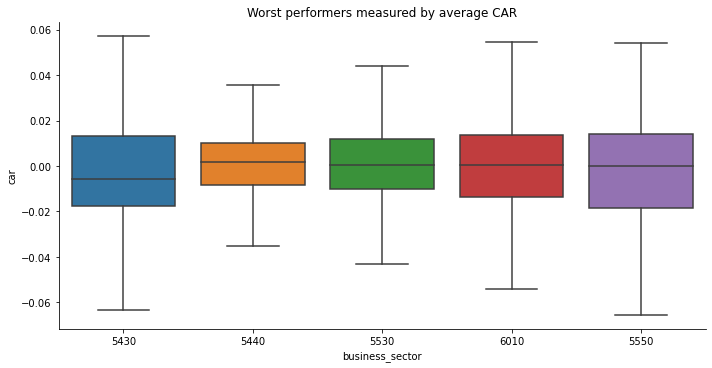

In [304]:
# filtering out best performing industries
top = tmp.groupby(by='business_sector').mean().sort_values(by='car', ascending=False).head(5).index
top_df = tmp.loc[tmp['business_sector'].isin(top)]
sns.catplot(data=top_df, x='business_sector', y='car',
            kind='box', showfliers=False, height=5, aspect=2
           ).set(title='Best performers measured by average CAR');
# print('top:', top_df.business_sector.value_counts()) # to count their occurence

# print('-------')

# filtering out worst performing industries
flop = tmp.groupby(by='business_sector').mean().sort_values(by='car', ascending=False).tail(5).index
flop_df = tmp.loc[tmp['business_sector'].isin(flop)]
sns.catplot(data=flop_df, x='business_sector', y='car',
            kind='box', showfliers=False, height=5, aspect=2
           ).set(title='Worst performers measured by average CAR')
# print('flop:', flop_df.business_sector.value_counts()) # to count their occurence

## industry_group

In [191]:
tmp.industry_group.nunique() # 55 sectors

55

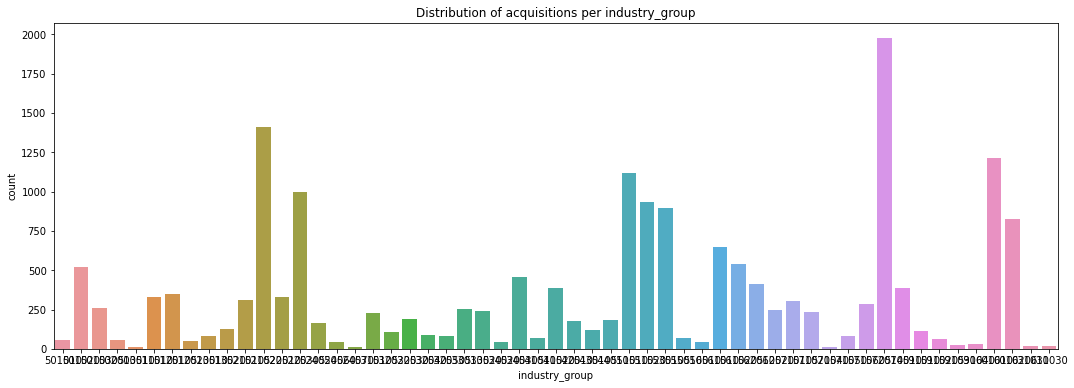

In [192]:
order = sorted(tmp.industry_group.unique())

plt.figure(figsize=(18,6))
plt.title("Distribution of acquisitions per industry_group")
sns.countplot(x=tmp.industry_group, order=order);

# target_industry

In [208]:
tmp['economic_sector'], tmp['business_sector'], tmp['industry_group'], tmp['industry'] = \
zip(*data['target_code'].map(declassifier))

/var/folders/z8/077xt3wd30j28k4_3vtz7gn00000gn/T/ipykernel_77799/2819975884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['economic_sector'], tmp['business_sector'], tmp['industry_group'], tmp['industry'] = \


## economic_sector

### Distribution

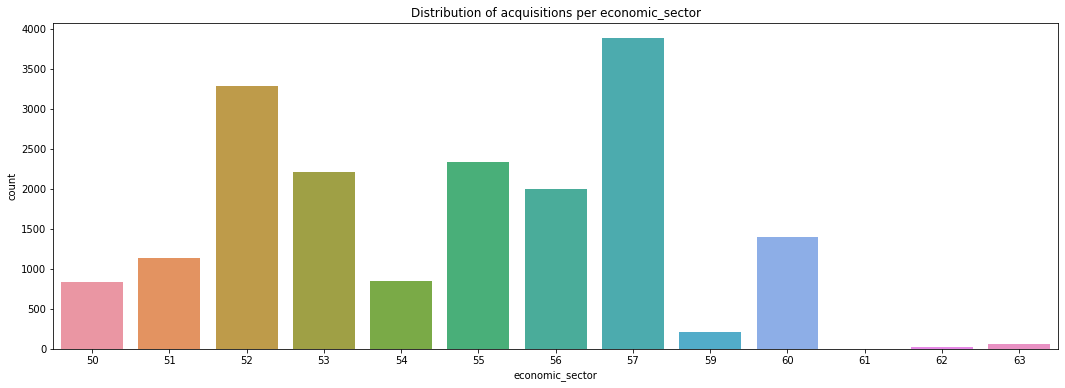

In [212]:
order = sorted(tmp.economic_sector.unique())

plt.figure(figsize=(18,6))
plt.title("Distribution of acquisitions per economic_sector")
sns.countplot(x=tmp.economic_sector, order=order);

### Impact on target

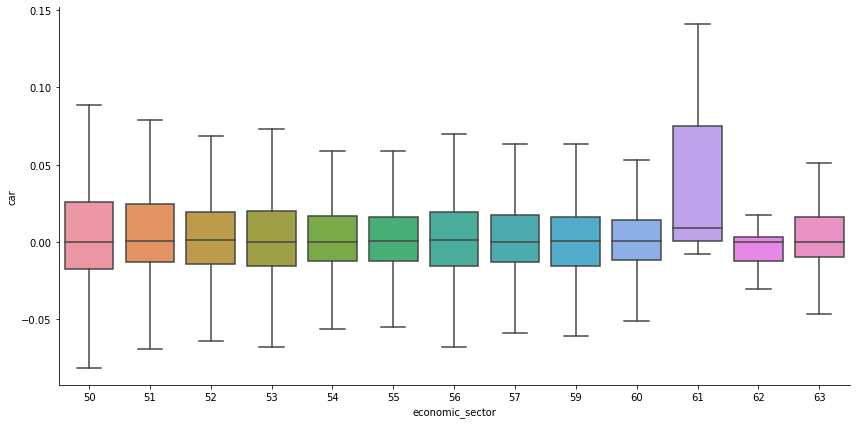

In [214]:
sns.catplot(data=tmp, x='economic_sector', y='car', kind='box', order=order, showfliers=False, height=6, aspect=2);

## business_sector

In [ ]:
print(tmp.business_sector.nunique()) # 29 sectors
tmp.business_sector.nunique() # 29 sectors

### Distribution

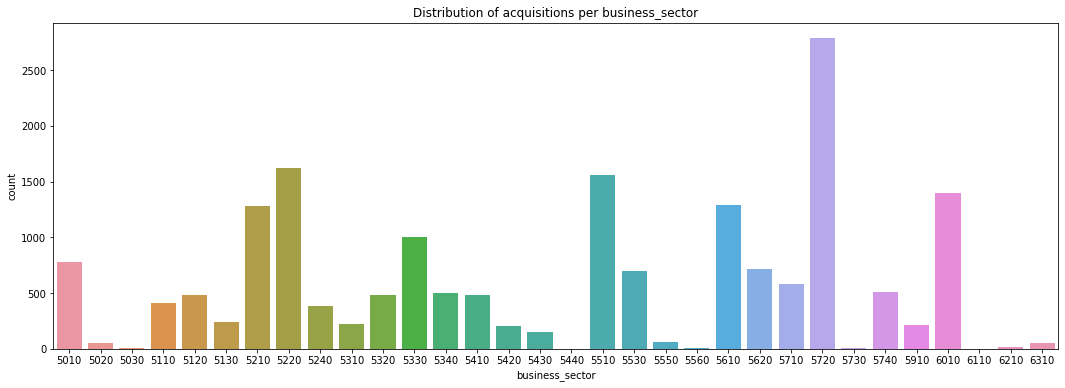

In [217]:
sectors = sorted(tmp.business_sector.unique())

plt.figure(figsize=(18,6))
plt.title("Distribution of acquisitions per business_sector")
sns.countplot(x=tmp.business_sector, order=sectors);

### Impact on target

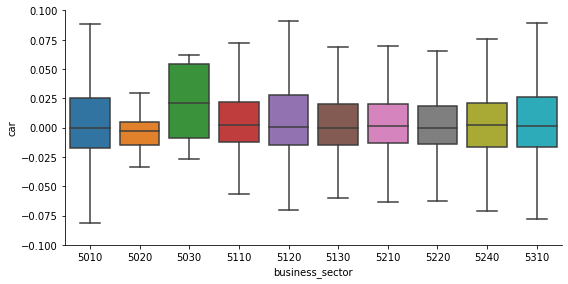

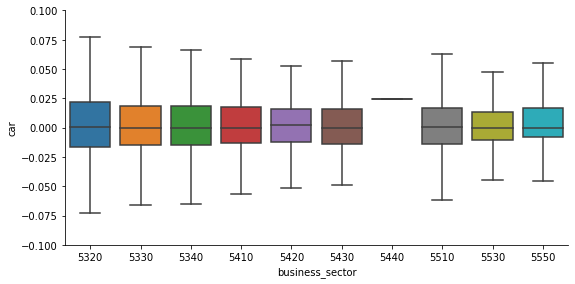

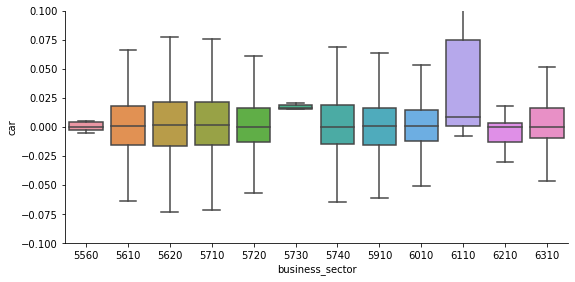

In [219]:
i = int(tmp.business_sector.nunique() / 3)
p1 = sectors[:i]
p2 = sectors[i: i + i]
p3 = sectors[i + i:]
tmp1 = tmp.loc[tmp['business_sector'].isin(p1)]
tmp2 = tmp.loc[tmp['business_sector'].isin(p2)]
tmp3 = tmp.loc[tmp['business_sector'].isin(p3)]
df = [tmp1, tmp2, tmp3]
order = [p1, p2, p3]

for df, order in zip(df, order):
    sns.catplot(data=df, x='business_sector', y='car',
                kind='box', order=order, showfliers=False, height=4, aspect=2).set(ylim=(-0.1, 0.1));

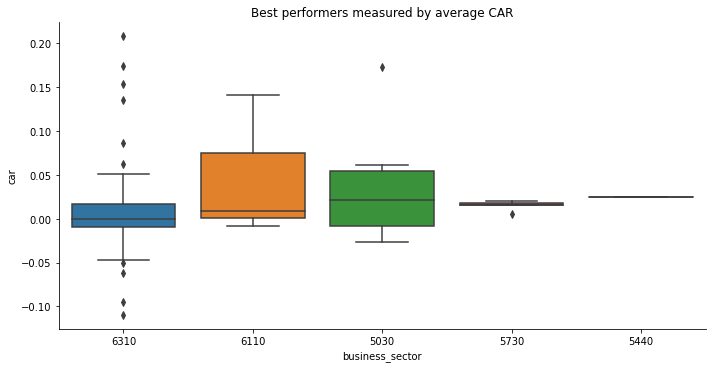

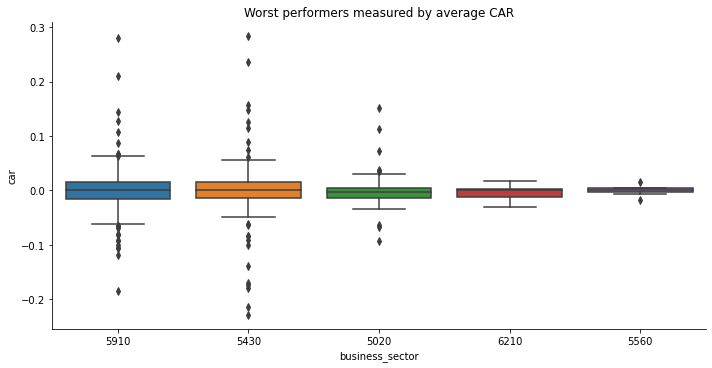

In [221]:
# filtering out best performing industries
top = tmp.groupby(by='business_sector').mean().sort_values(by='car', ascending=False).head(5).index
top_df = tmp.loc[tmp['business_sector'].isin(top)]
sns.catplot(data=top_df, x='business_sector', y='car',
            kind='box', showfliers=True, height=5, aspect=2
           ).set(title='Best performers measured by average CAR');
# print('top:', top_df.business_sector.value_counts()) # to count their occurence

# print('-------')

# filtering out worst performing industries
flop = tmp.groupby(by='business_sector').mean().sort_values(by='car', ascending=False).tail(5).index
flop_df = tmp.loc[tmp['business_sector'].isin(flop)]
sns.catplot(data=flop_df, x='business_sector', y='car',
            kind='box', showfliers=True, height=5, aspect=2
           ).set(title='Worst performers measured by average CAR');
# print('flop:', flop_df.business_sector.value_counts()) # to count their occurence